In [1]:
%load_ext autoreload
%autoreload 1
%aimport utils
from utils import *
import os
from IPython import display
%matplotlib inline

In [2]:
execfile('../../matplotlibrc.py')

# Question 1

In [22]:
print read_params()

&dat
 params%flx_scheme=1,
 params%timestep_scheme=1,
 params%nx=50,
 params%p_exit_ratio=0.8,
 params%eps=0.3,
 params%tol=1e-14,
 params%max_iter=100000,
 params%cfl=0.2/



In [14]:
def savefig(fig, name):
    filepath = 'tex/figs/%s.pdf' % name
    fig.tight_layout()
    fig.savefig(filepath)

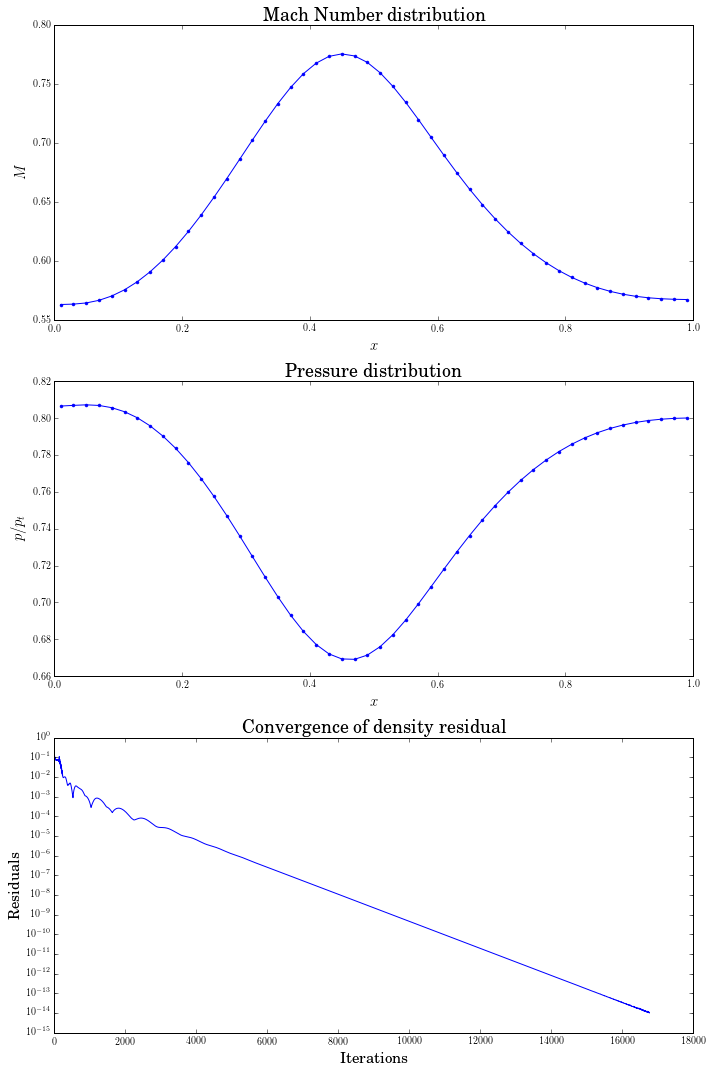

In [111]:
def q1():
    modify_param('flx_scheme', 1)
    modify_param('timestep_scheme', 1)
    modify_param('max_iter', 100000)
    modify_param('p_exit_ratio', 0.8)
    modify_param('nx', 50)
    modify_param('eps', 0.30)
    modify_param('cfl', 0.4)
    run()
    state, resi, time = read_data()
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
    plot_mach(state, ax1)
    plot_pressure(state, ax2)
    plot_residual(resi, ax3)
    savefig(fig, 'q1')
    
q1()

# Question 2 - Exit Pressure Study

In [112]:
q2_params = {
    'flx_scheme': 1,
    'timestep_scheme': 1,
    'max_iter': 1000000,
    'nx': 50,
    'cfl':0.1,
}

In [113]:
def q2_test():
    """Used to look for correct epsilon value"""
    for k, v in q2_params.items():
        modify_param(k, v)
    
    modify_param('p_exit_ratio', 0.76)
    eps = float(raw_input('Enter EPS: '))
    modify_param('eps', eps)
    run()
    state, resi, time = read_data()
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 14))
    plot_pressure(state, ax1)
    plot_mach(state, ax2)
    
# q2_test()

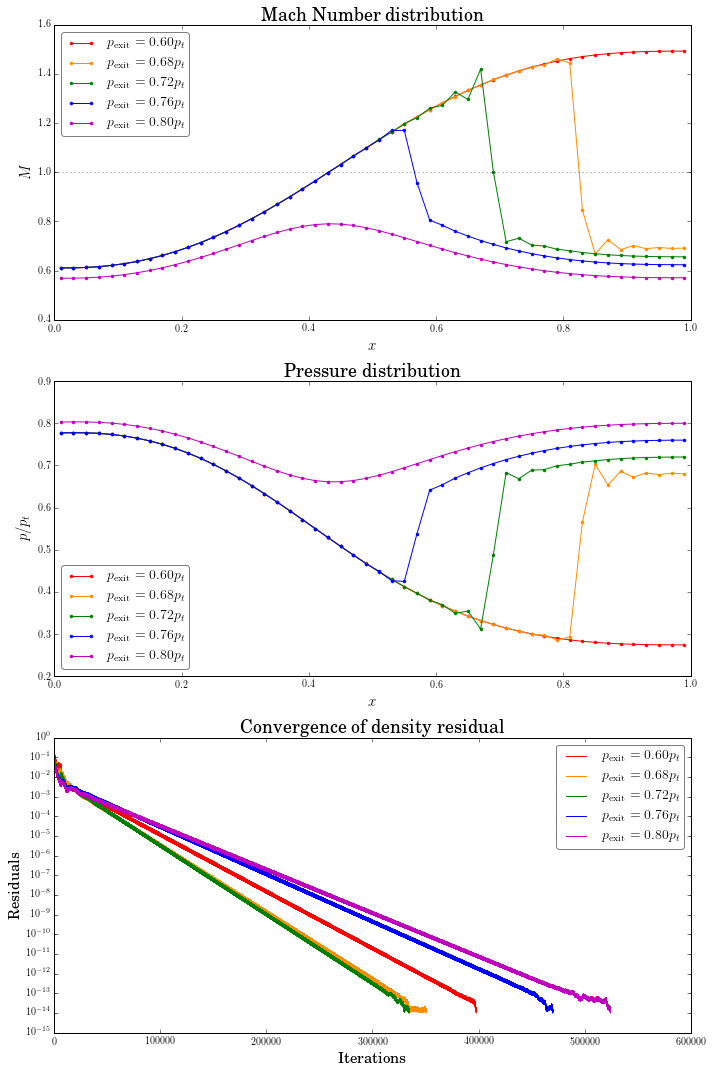

In [122]:
def q2():
    for k, v in q2_params.items():
        modify_param(k, v)
    eps = 0.05
    pratios = [0.6, 0.68, 0.72, 0.76, 0.8]
    colors = mk_colors(pratios)
    colors = reversed(colors)
    modify_param('eps', eps)
    fig, axes = plt.subplots(nrows=3, figsize=(10, 15))
    ax1, ax2, ax3 = axes
    for color, pratio in zip(colors, pratios):
        modify_param('p_exit_ratio', pratio)
        out = run()
        state, resi, time = read_data()
        label = r'$p_{\mathrm{exit}} = %.2f p_t$' % pratio
        opt = dict(color=color, label=label)
        plot_mach(state, ax1, **opt)
        plot_pressure(state, ax2, **opt)
        plot_residual(resi, ax3, **opt)
    
    for ax in axes:
        ax.legend()
    fig.tight_layout()
    savefig(fig, 'q2')
    
q2()

Lack of dissipation leads to wiggles. Solution still stable, i.e. does not blow up, but the dispersion errors become dominant in these cases. 

Moreover, the shock is completely dissipated and leads to fully supersonic flow at pexit = 0.6. 

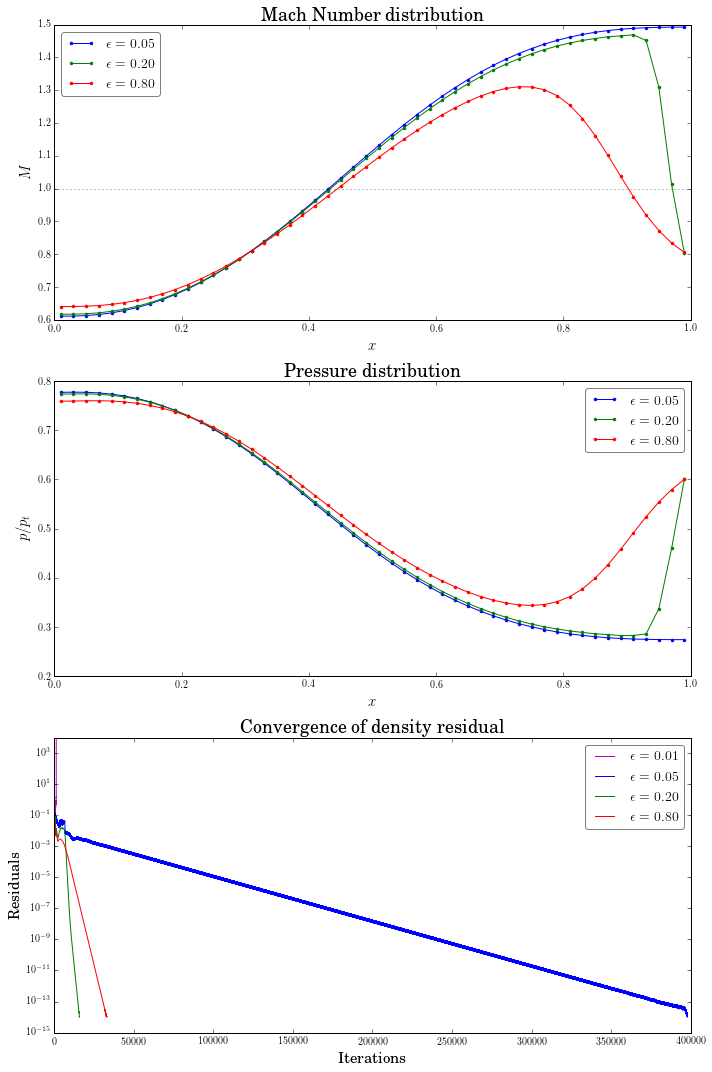

In [123]:
def q2_eps():
    for k, v in q2_params.items():
        modify_param(k, v)
    
    pratio = 0.6
    modify_param('p_exit_ratio', pratio)
    all_eps = [0.01, 0.05, 0.2, 0.8]
    colors = mk_colors(all_eps)
    fig, axes = plt.subplots(nrows=3, figsize=(10, 15))
    ax1, ax2, ax3 = axes
    for color, eps in zip(colors, all_eps):
        modify_param('eps', eps)
        out = run()
        state, resi, time = read_data()
        label = r'$\epsilon = %.2f$' % eps
        opt = dict(color=color, label=label)
        plot_residual(resi, ax3, **opt)
        if eps == all_eps[0]:
            continue
        plot_mach(state, ax1, **opt)
        plot_pressure(state, ax2, **opt)
        
    for ax in axes:
        ax.legend()
    ylim1, ylim2 = ax3.get_ylim()
    ax3.set_ylim(ylim1, 10000)
    fig.tight_layout()
    savefig(fig, 'q2_eps')
    
q2_eps()

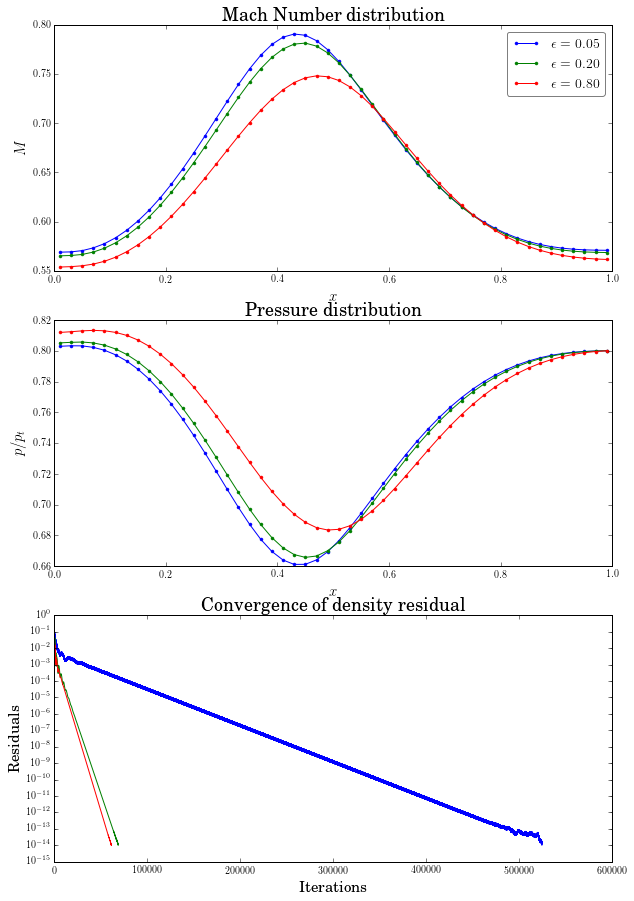

In [116]:
def q2_eps2():
    for k, v in q2_params.items():
        modify_param(k, v)
    
    pratio = 0.8
    modify_param('p_exit_ratio', pratio)
    all_eps = [0.05, 0.2, 0.8]
    colors = mk_colors(all_eps)
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
    for color, eps in zip(colors, all_eps):
        modify_param('eps', eps)
        out = run()
        state, resi, time = read_data()
        plot_mach(state, ax1, color=color, label=r'$\epsilon = %.2f$' % eps)
        plot_pressure(state, ax2, color=color)
        plot_residual(resi, ax3, color=color)
    
    ax1.legend()
#     savefig(fig, 'q2_eps')
    
q2_eps2()

---
# Question 3 - Grid Study

In [12]:
def find_shock_mach(mach):
    idx = [i for i in range(len(mach) - 1)
           if (mach[i+1] < mach[i]) and i > len(mach)/2]
    return idx[0]

[0.96855444024563053, 0.96576424657534243, 0.96338214926783183, 0.96215401039206427]
[1.0714485645286649, 1.213121340093982, 1.2999128177363024, 1.3431756081279491]
\begin{tabular}{@{} l l @{}}
        \toprule
        $N$ & $p_{t,\mathrm{exit}}/p_{t,\mathrm{inlet}} \\
        \midrule
        
25 & 0.9686 \\
50 & 0.9658 \\
100 & 0.9634 \\
200 & 0.9622 \\

        \bottomrule
        \end{tabular}


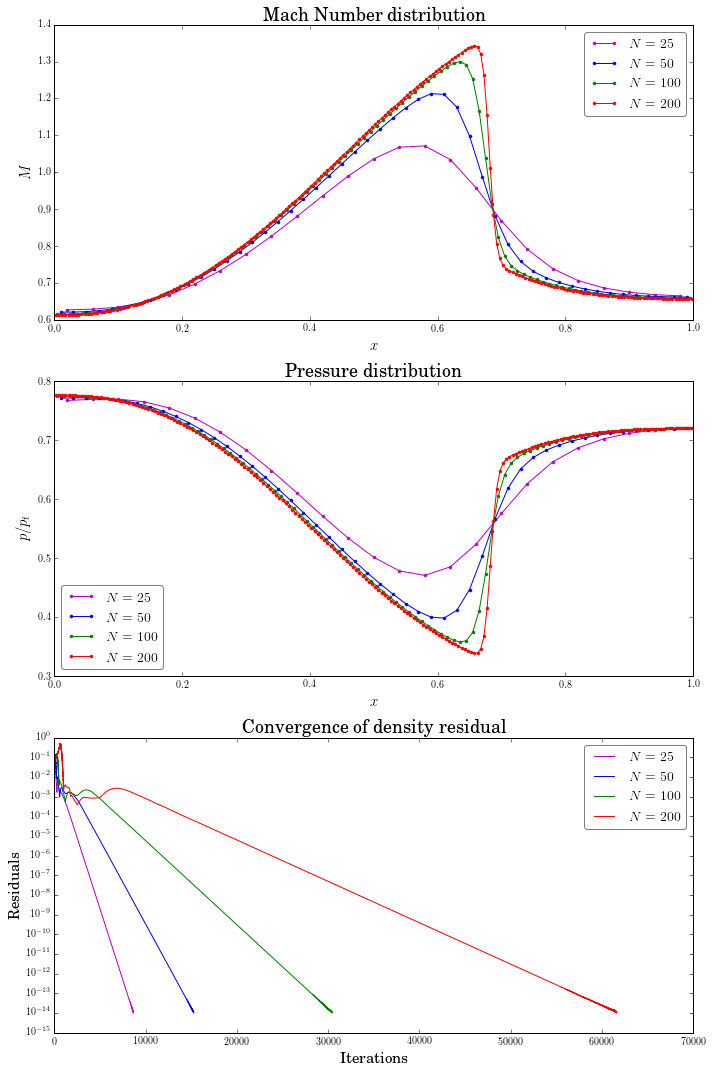

In [17]:
def q3():
    modify_param('flx_scheme', 1)
    modify_param('timestep_scheme', 1)
    modify_param('cfl', 0.4)
    modify_param('max_iter', 1000000000)
    modify_param('p_exit_ratio', 0.72)
    modify_param('eps', 0.3)
    
    all_nx = [25, 50, 100, 200]
    colors = mk_colors(all_nx)
    fig, axes = plt.subplots(nrows=3, figsize=(10, 15))
    ax1, ax2, ax3 = axes
    ploss = []
    mx = []
    for color, nx in zip(colors, all_nx):
        modify_param('nx', nx)
        out = run()
        state, resi, time = read_data()
        label = r'$N = %d$' % nx
        opt = dict(color=color, label=label)
        plot_residual(resi, ax3, **opt)
        plot_mach(state, ax1, **opt)
        plot_pressure(state, ax2, **opt)
        
        mach = calc_mach(state)
        idx = find_shock_mach(mach)
        mx.append(mach[idx])
        ploss.append(state['ptot'][-1]/state['ptot'][0])
        
    print ploss
    print mx
    for ax in axes:
        ax.legend()

    fig.tight_layout()
    savefig(fig, 'q3')
    
    table_fmt = r'''\begin{tabular}{@{} l l @{}}
        \toprule
        $N$ & $p_{t,\mathrm{exit}}/p_{t,\mathrm{inlet}} \\
        \midrule
        
%s

        \bottomrule
        \end{tabular}'''
    lines = []
    for i in range(len(all_nx)):
        lines.append(r'%d & %.4f \\' % (all_nx[i], ploss[i]))
    body = '\n'.join(lines)
    table = table_fmt % body
    print table
    open('tex/table_q3_ploss.tex', 'w').write(table)
    
q3()

In [10]:
def q3_eps():
    modify_param('flx_scheme', 1)
    modify_param('timestep_scheme', 1)
    modify_param('cfl', 0.4)
    modify_param('max_iter', 10000)
    modify_param('p_exit_ratio', 0.72)
    
    all_nx = [25, 50, 100, 200]
    step = -0.01
    all_eps = np.arange(0.3, 0.05 + step, step)
    min_eps = []
    for nx in all_nx:
        modify_param('nx', nx)
        for eps in all_eps:
            modify_param('eps', eps)
            out = run()
            if 'unconverged' in out.lower():
                min_eps.append(eps)
                break
                
    table_fmt = r'''\begin{tabular}{@{} l l @{}}
        \toprule
        $N$ & $\epsilon_{\mathrms{min}} \\
        \midrule

%s

        \bottomrule
        \end{tabular}
    '''
    lines = []
    for i in range(len(all_nx)):
        lines.append(r'%d & %.2f \\' % (all_nx[i], min_eps[i]))
    body = '\n'.join(lines)
    table = table_fmt % body
    print(table)
    open('tex/table_q3_eps.tex', 'w').write(table)
            
q3_eps()

\begin{tabular}{@{} l l @{}}
        \toprule
        $N$ & $\epsilon_{\mathrms{min}} \\
        \midrule

25 & 0.18 \\
50 & 0.19 \\
100 & 0.23 \\
200 & 0.27 \\

        \bottomrule
        \end{tabular}
    


### Discussion
Refining the mesh takes more iterations, but a mesh too coarse cannot capture the shock adequately.

However, the solutions seem to be converging towards a mesh-independent solution.

---
# Question 4 - Spatial Discretization Scheme Study

\begin{tabular}{@{} l l @{}}
        \toprule
        Scheme & $p_{t,\mathrm{exit}}/p_{t,\mathrm{inlet}} \\
        \midrule
        
SD & 0.9643 \\
SW & 0.9622 \\
MSW & 0.9602 \\
CMSW & 0.9602 \\
Roe & 0.9602 \\

        \bottomrule
        \end{tabular}


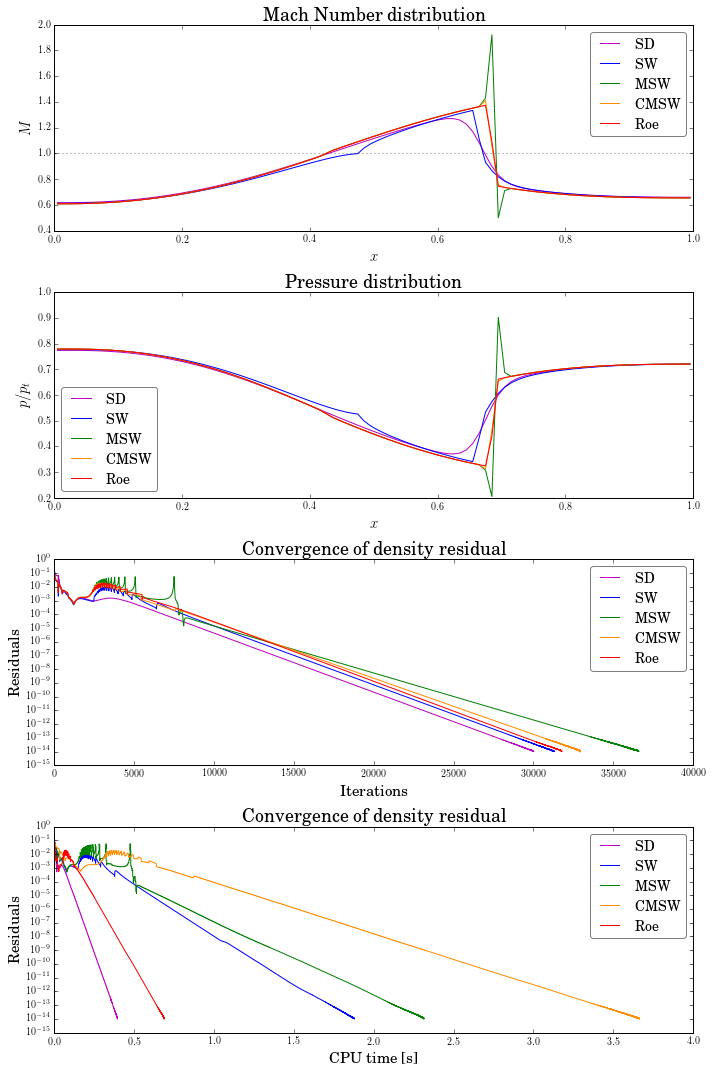

In [26]:
def q4():
    modify_param('timestep_scheme', 1)
    modify_param('max_iter', 100000)
    modify_param('nx', 100)
    modify_param('cfl', 0.4)
    modify_param('eps', 0.4)
    modify_param('p_exit_ratio', 0.72)
    flx_schemes = [
        (1, 'SD'),
        (2, 'SW'),
        (3, 'MSW'),
        (4, 'CMSW'),
        (5, 'Roe'),
    ]
    fig, axes = plt.subplots(nrows=4, figsize=(10, 15))
    ax1, ax2, ax3, ax4 = axes
    colors = mk_colors(flx_schemes)
    ploss = []
    for flx_scheme, name in flx_schemes:
        i = flx_scheme - 1
        color = colors[i]
        modify_param('flx_scheme', flx_scheme)
        run()
        state, resi, time = read_data()
        label = name
        opt = dict(color=color, label=label, marker='')
        plot_mach(state, ax1, **opt)
        plot_pressure(state, ax2, **opt)
        plot_residual(resi, ax3, **opt)
        plot_residual_time(resi, time, ax4, **opt)
        ploss.append(state['ptot'][-1]/state['ptot'][0])
        
    for ax in axes:
        ax.legend()
        
    fig.tight_layout()
    savefig(fig, 'q4')
    
    table_fmt = r'''\begin{tabular}{@{} l l @{}}
        \toprule
        Scheme & $p_{t,\mathrm{exit}}/p_{t,\mathrm{inlet}} \\
        \midrule
        
%s

        \bottomrule
        \end{tabular}'''
    lines = []
    for i in range(len(flx_schemes)):
        lines.append(r'%s & %.4f \\' % (flx_schemes[i][1], ploss[i]))
    body = '\n'.join(lines)
    table = table_fmt % body
    print table
    open('tex/table_q4_ploss.tex', 'w').write(table)
    
q4()

### Discussion

Indeed, MSW does not contain enough dissipation in the region of discontinuity -- it is greatly amplified. CMSW corrects for that and provides a more realistic behavior. However, it requires the most time. 

The Scalar Dissipation is the most dissipative of all.

----
# Question 5 - Temporal Discretization Scheme Study

## With Corrected-Modified-Steger-Warming

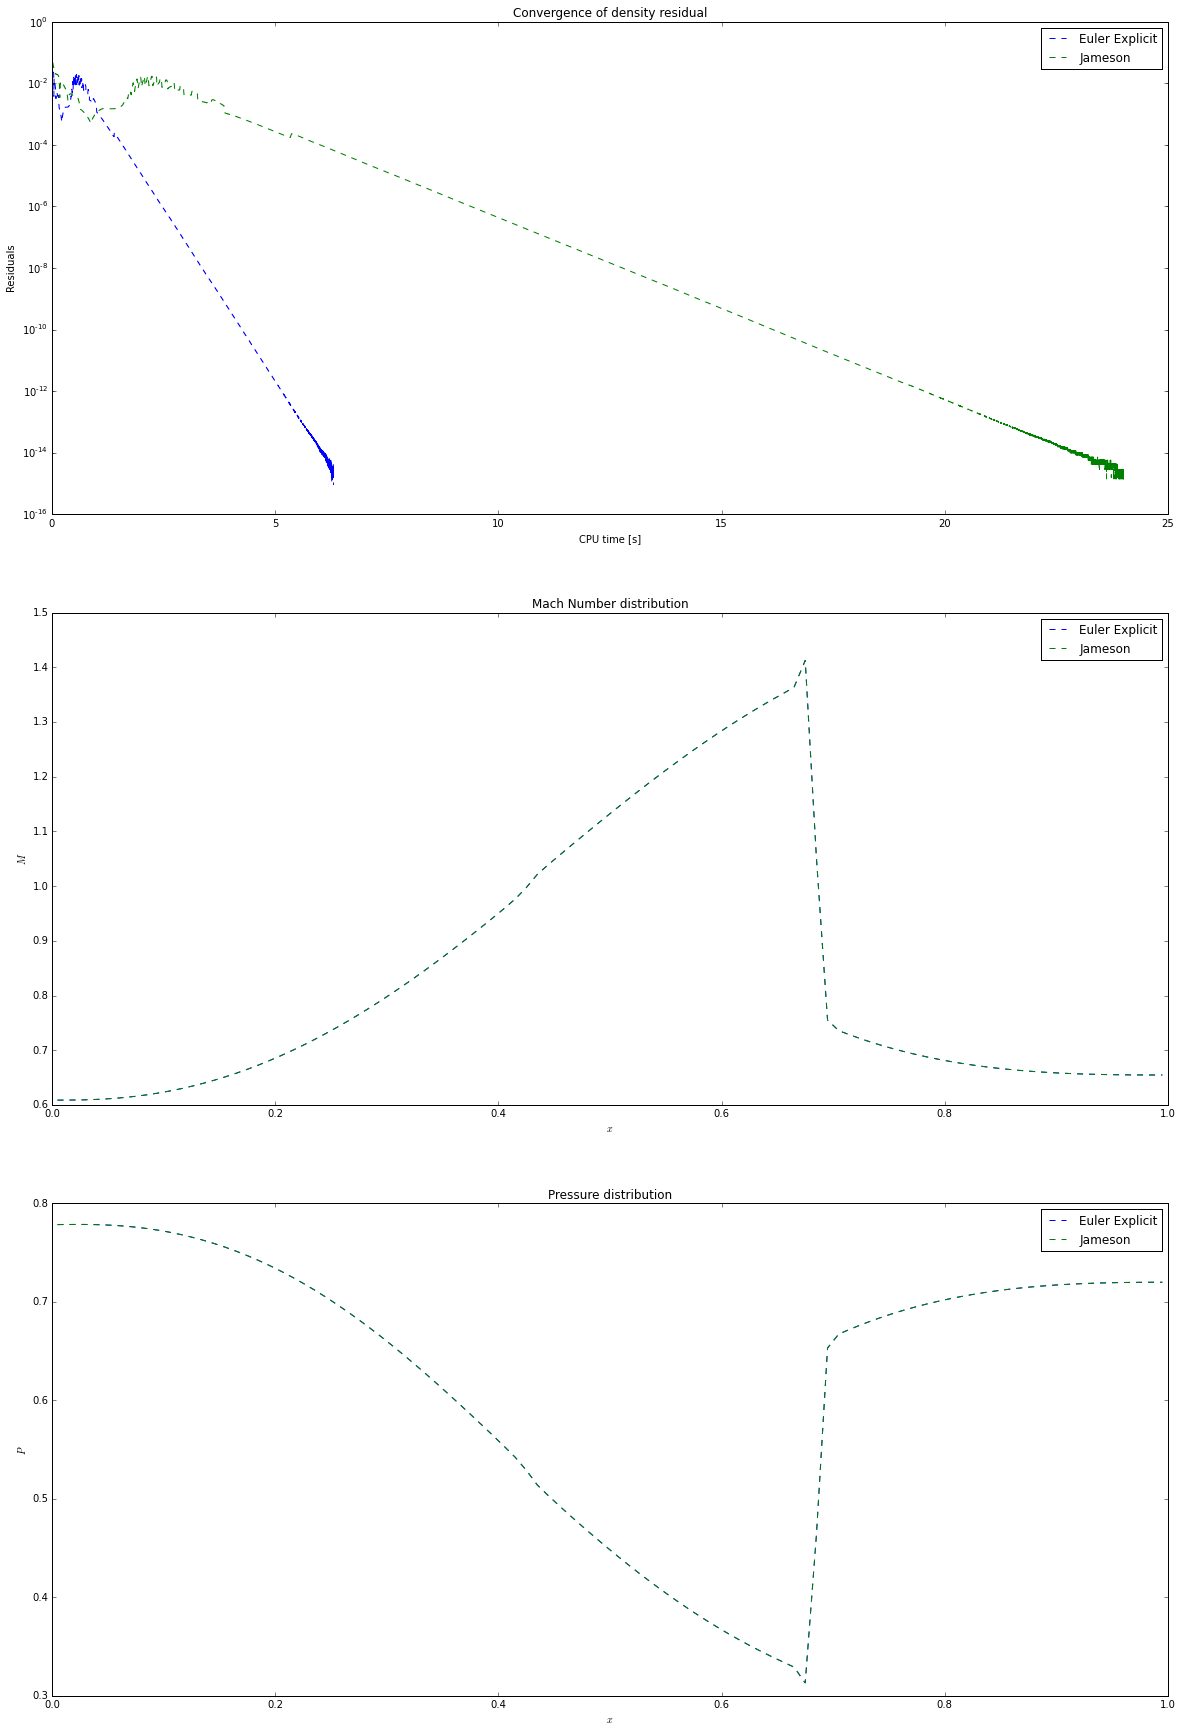

In [84]:
modify_param('flx_scheme', 4)
time_schemes = [
    (1, 'Euler Explicit'),
    (2, 'Jameson'),
]
opt = {'marker': None}
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 30))
results = []
for i, time_scheme in time_schemes:
    modify_param('timestep_scheme', i)
    run()
    state, resi, time = read_data()
    plot_residual_time(resi, time, ax1, label='%s' % time_scheme, **opt)
    plot_mach(state, ax2, label='%s' % time_scheme, **opt)
    plot_pressure(state, ax3, label='%s' % time_scheme, **opt)
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
plt.show()

Jameson's timestepping scheme takes almost 5 times as long, but both yield the exact same results in this case. 